# Project: Diagnostic reasoning assistant

**Author:** Julia Parnis 
**Date:** February 7, 2026  
**Project:** Data Science Bootcamp - Final Projec

## Project Overview

**Goal:** Build an AI-powered diagnostic assistant that provides ranked differential diagnoses through iterative questioning, with enhanced detection of rare and overlooked conditions.

**Key Innovation:** Two-tier ML architecture combined with RAG (Retrieval-Augmented Generation) for transparent clinical reasoning and literature-backed rare disease identification.

**Dataset:** DDXPlus - 1.3M synthetic patient cases, 49 pathologies  
**Source:** [Hugging Face](https://huggingface.co/datasets/aai530-group6/ddxplus)
**Citation:** Fansi Tchango et al. (2022)

**Note:** This is a synthetic dataset (computer-generated from medical knowledge bases) designed for research and education. It provides a robust, privacy-compliant foundation for developing diagnostic AI systems.

# Notebook 1: Data Exploration

**Objective:** Load and explore the DDXPlus dataset to understand structure, quality, and feature distributions.

**Tasks:**
1. Load and inspect dataset structure
2. Fix data type issues
3. Assess data quality (missing values, duplicates)
4. Visualize key patterns (diseases, demographics, symptoms)
5. Analyze evidence and condition mappings
6. Save processed data for modeling


In [15]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stat as st

In [16]:
import json
from collections import Counter

In [ ]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
sns.set_palette("husl")


In [23]:
# Academic style settings
plt.style.use('seaborn-v0_8-white')
sns.set_context("talk", font_scale=0.9)

# Colorblind-safe palette (IBM Design Colors)
IBM_COLORS = {
    'blue': '#648FFF',
    'purple': '#785EF0', 
    'magenta': '#DC267F',
    'orange': '#FE6100',
    'yellow': '#FFB000',
    'teal': '#06A39B',
    'gray': '#5F6368'
}

# Set consistent figure parameters
FIGSIZE_SINGLE = (10, 6)
FIGSIZE_DOUBLE = (14, 6)
DPI = 300  # High resolution for presentation

print("✓ Visualization settings configured")

✓ Visualization settings configured


In [2]:
from datasets import load_dataset
dataset = load_dataset("aai530-group6/ddxplus")

c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\julia\.cache\huggingface\hub\datasets--aai530-group6--ddxplus. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an 

The dataset is already split.   
Split breakdown:  
- Train: 1,025,602 examples (79.0%)  
- Validation: 132,448 examples (10.2%)  
- Test: 134,529 examples (10.8%)  
- Total: 1,292,579 examples  

In [6]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [10]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['AGE', 'DIFFERENTIAL_DIAGNOSIS', 'SEX', 'PATHOLOGY', 'EVIDENCES', 'INITIAL_EVIDENCE'],
        num_rows: 1025602
    })
    test: Dataset({
        features: ['AGE', 'DIFFERENTIAL_DIAGNOSIS', 'SEX', 'PATHOLOGY', 'EVIDENCES', 'INITIAL_EVIDENCE'],
        num_rows: 134529
    })
    validate: Dataset({
        features: ['AGE', 'DIFFERENTIAL_DIAGNOSIS', 'SEX', 'PATHOLOGY', 'EVIDENCES', 'INITIAL_EVIDENCE'],
        num_rows: 132448
    })
})


**Observation:** the dataset is split and appears in datasets.dataset_dict.DatasetDict format. The first could be restrictive for comprehensive EDA. The latter does not allow to perform all of the EDA processes.  

**Decision:** the dataset will be merged and converted to the pandas dataset to allow for the comprehensive EDA.

In [ ]:
# Combine all splits for comprehensive analysis
from datasets import concatenate_datasets

all_data = concatenate_datasets([
    dataset['train'], 
    dataset['validate'], 
    dataset['test']
])

# Convert to pandas for EDA
df_all = all_data.to_pandas()

print(f"Total samples: {len(df_all)}")
print(f"✓ Converted to pandas DataFrame: {df_all.shape[0]:,} rows × {df_all.shape[1]} columns")



Total samples: 1292579


In [14]:
# Initial Data Exploration
print("="*60)
print("INITIAL DATA EXPLORATION")
print("="*60)

print("\n1. First 5 rows:")
display(df_all.head())

print("\n2. Data types and missing values:")
print(df_all.info())

print("\n3. Basic statistics:")
display(df_all.describe())


INITIAL DATA EXPLORATION

1. First 5 rows:


,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
0,18,"[['Bronchitis', 0.19171203430383882], ['Pneumo...",M,URTI,"['E_48', 'E_50', 'E_53', 'E_54_@_V_161', 'E_54...",E_91
1,21,"[['HIV (initial infection)', 0.518950056440760...",M,HIV (initial infection),"['E_9', 'E_27', 'E_50', 'E_51', 'E_53', 'E_54_...",E_50
2,19,"[['Bronchitis', 0.11278064619119596], ['Pneumo...",F,Pneumonia,"['E_53', 'E_54_@_V_179', 'E_54_@_V_192', 'E_55...",E_77
3,34,"[['URTI', 0.23859396799565236], ['Cluster head...",F,URTI,"['E_48', 'E_53', 'E_54_@_V_183', 'E_55_@_V_89'...",E_53
4,36,"[['URTI', 0.23677812769175735], ['Influenza', ...",M,URTI,"['E_49', 'E_50', 'E_53', 'E_54_@_V_183', 'E_55...",E_201



2. Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292579 entries, 0 to 1292578
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   AGE                     1292579 non-null  int64 
 1   DIFFERENTIAL_DIAGNOSIS  1292579 non-null  object
 2   SEX                     1292579 non-null  object
 3   PATHOLOGY               1292579 non-null  object
 4   EVIDENCES               1292579 non-null  object
 5   INITIAL_EVIDENCE        1292579 non-null  object
dtypes: int64(1), object(5)
memory usage: 59.2+ MB
None

3. Basic statistics:


,AGE
count,1.292579e+06
mean,3.972967e+01
std,2.272213e+01
min,0.000000e+00
25%,2.200000e+01
50%,3.900000e+01
75%,5.600000e+01
max,1.090000e+02


**Problem:** the columns "Evidences" and "Initial_Evidence" are encoded.  
**Solution:** to import additional files decoding these columns and incorporate them for the sake of EDA.


In [18]:
# Load evidence and condition mappings
print("Loading mapping files...")

with open('data/release_evidences.json', 'r', encoding='utf-8') as f:
    evidences = json.load(f)

with open('data/release_conditions.json', 'r', encoding='utf-8') as f:
    conditions = json.load(f)

print(f"✓ {len(evidences)} evidence codes loaded")
print(f"✓ {len(conditions)} conditions loaded")


Loading mapping files...
✓ 223 evidence codes loaded
✓ 49 conditions loaded


In [19]:
# Examine mapping file structure
print("="*70)
print("MAPPING FILE STRUCTURE")
print("="*70)

# Example evidence (binary)
print("\nExample Evidence (Binary):")
example_binary = 'E_91'
print(f"Code: {example_binary}")
print(json.dumps(evidences[example_binary], indent=2))

# Example evidence (categorical)
print("\nExample Evidence (Categorical):")
example_cat = list(evidences.keys())[50]  # Pick one with values
if 'value_meaning' in evidences[example_cat]:
    print(f"Code: {example_cat}")
    print(json.dumps(evidences[example_cat], indent=2))

# Example condition
print("\nExample Condition:")
example_cond = 'URTI'
print(f"Code: {example_cond}")
print(json.dumps(conditions[example_cond], indent=2))


MAPPING FILE STRUCTURE

Example Evidence (Binary):
Code: E_91
{
  "name": "E_91",
  "code_question": "E_91",
  "question_fr": "Avez-vous objectiv\u00e9 ou ressenti de la fi\u00e8vre?",
  "question_en": "Do you have a fever (either felt or measured with a thermometer)?",
  "is_antecedent": false,
  "default_value": 0,
  "value_meaning": {},
  "possible-values": [],
  "data_type": "B"
}

Example Evidence (Categorical):
Code: E_96
{
  "name": "E_96",
  "code_question": "E_96",
  "question_fr": "Avez-vous pris du poids r\u00e9cemment?",
  "question_en": "Have you gained weight recently?",
  "is_antecedent": false,
  "default_value": 0,
  "value_meaning": {},
  "possible-values": [],
  "data_type": "B"
}

Example Condition:
Code: URTI
{
  "condition_name": "URTI",
  "cond-name-fr": "IVRS ou vir\u00e9mie",
  "cond-name-eng": "URTI",
  "icd10-id": "j06.9",
  "symptoms": {
    "E_55": {},
    "E_53": {},
    "E_57": {},
    "E_54": {},
    "E_59": {},
    "E_56": {},
    "E_58": {},
    "E_201

In [20]:
# Analyze evidence data types and structure
print("="*70)
print("EVIDENCE TYPE ANALYSIS")
print("="*70)

# Count by data type
binary_evidences = []
categorical_evidences = []
multichoice_evidences = []

for code, info in evidences.items():
    dtype = info['data_type']
    if dtype == 'B':
        binary_evidences.append(code)
    elif dtype == 'C':
        categorical_evidences.append(code)
    elif dtype == 'M':
        multichoice_evidences.append(code)

print(f"\nTotal evidences: {len(evidences)}")
print(f"  Binary (B):      {len(binary_evidences):>3}")
print(f"  Categorical (C): {len(categorical_evidences):>3}")
print(f"  Multi-choice (M): {len(multichoice_evidences):>3}")

# Find categorical evidences with actual values
categorical_with_values = [
    code for code in categorical_evidences 
    if evidences[code]['value_meaning']
]

print(f"\nCategorical evidences with value mappings: {len(categorical_with_values)}")


EVIDENCE TYPE ANALYSIS

Total evidences: 223
  Binary (B):      208
  Categorical (C):  10
  Multi-choice (M):   5

Categorical evidences with value mappings: 4


In [21]:
# Display examples of each evidence type
print("\n" + "="*70)
print("EVIDENCE EXAMPLES")
print("="*70)

# Binary examples
print("\n1. BINARY EVIDENCES (Yes/No questions)")
print("-" * 70)

for i, code in enumerate(binary_evidences[:3], 1):
    ev = evidences[code]
    print(f"\nExample {i}: {code}")
    print(f"  Question: {ev['question_en']}")
    print(f"  Is antecedent: {ev['is_antecedent']}")
    print(f"  Default value: {ev['default_value']}")

# Categorical examples
if categorical_with_values:
    print("\n\n2. CATEGORICAL EVIDENCES (Multiple choice questions)")
    print("-" * 70)
    
    for i, code in enumerate(categorical_with_values[:3], 1):
        ev = evidences[code]
        print(f"\nExample {i}: {code}")
        print(f"  Question: {ev['question_en']}")
        print(f"  Is antecedent: {ev['is_antecedent']}")
        print(f"  Possible values: {ev['possible-values'][:5]}")  # First 5
        print(f"  Value meanings (sample):")
        # Show first 3 value meanings
        for j, (val_code, meaning) in enumerate(list(ev['value_meaning'].items())[:3], 1):
            print(f"    {val_code}: {meaning}")
        if len(ev['value_meaning']) > 3:
            print(f"    ... and {len(ev['value_meaning']) - 3} more values")
else:
    print("\n\n2. CATEGORICAL EVIDENCES")
    print("-" * 70)
    print("  No categorical evidences with value mappings found")



EVIDENCE EXAMPLES

1. BINARY EVIDENCES (Yes/No questions)
----------------------------------------------------------------------

Example 1: E_91
  Question: Do you have a fever (either felt or measured with a thermometer)?
  Is antecedent: False
  Default value: 0

Example 2: E_53
  Question: Do you have pain somewhere, related to your reason for consulting?
  Is antecedent: False
  Default value: 0

Example 3: E_159
  Question: Did you lose consciousness?
  Is antecedent: False
  Default value: 0


2. CATEGORICAL EVIDENCES (Multiple choice questions)
----------------------------------------------------------------------

Example 1: E_130
  Question: What color is the rash?
  Is antecedent: False
  Possible values: ['V_11', 'V_86', 'V_107', 'V_138', 'V_156']
  Value meanings (sample):
    V_11: {'fr': 'NA', 'en': 'NA'}
    V_86: {'fr': 'foncée', 'en': 'dark'}
    V_107: {'fr': 'jaune', 'en': 'yellow'}
    ... and 3 more values

Example 2: E_135
  Question: Is the lesion (or are the l

In [22]:
# Analyze antecedents (risk factors vs symptoms)
print("\n" + "="*70)
print("ANTECEDENT ANALYSIS")
print("="*70)

antecedents = [code for code, info in evidences.items() if info['is_antecedent']]
symptoms = [code for code, info in evidences.items() if not info['is_antecedent']]

print(f"\nAntecedents (risk factors):  {len(antecedents):>3}")
print(f"Symptoms (current findings): {len(symptoms):>3}")

print("\nExample Antecedents (Risk Factors):")
for code in antecedents[:3]:
    print(f"  - {code}: {evidences[code]['question_en']}")

print("\nExample Symptoms (Current Findings):")
for code in symptoms[:3]:
    print(f"  - {code}: {evidences[code]['question_en']}")



ANTECEDENT ANALYSIS

Antecedents (risk factors):  113
Symptoms (current findings): 110

Example Antecedents (Risk Factors):
  - E_16: Do you feel anxious?
  - E_102: Are you consulting because you have high blood pressure?
  - E_196: Have you had surgery within the last month?

Example Symptoms (Current Findings):
  - E_91: Do you have a fever (either felt or measured with a thermometer)?
  - E_55: Do you feel pain somewhere?
  - E_53: Do you have pain somewhere, related to your reason for consulting?


---

### Evidence Structure Summary

#### Overview

The DDXPlus dataset contains **223 evidence codes** representing symptoms and risk factors.

| Type | Count | % | Description |
|------|------:|--:|-------------|
| Binary (B) | 208 | 93% | Yes/No questions |
| Categorical (C) | 10 | 4% | Multiple choice (with values) |
| Multi-choice (M) | 5 | 2% | Multiple selections possible |
| **Total** | **223** | **100%** | |

**Note:** Only 4 categorical evidences have value mappings (others are simple binary).

---

#### Evidence Categories

| Category | Count | Purpose |
|----------|------:|---------|
| **Antecedents** | 113 | Risk factors (medical history, demographics, behaviors) |
| **Symptoms** | 110 | Current clinical findings (fever, pain, etc.) |

**Examples:**
- **Antecedents:** Anxiety, high blood pressure history, recent surgery
- **Symptoms:** Fever, pain, loss of consciousness

---


#### Data Structure

**Binary evidence:**  
E_91 → "Do you have a fever?"  
Values: 0 (no) or 1 (yes)  

**Categorical evidence:**
E_130 @ V_86 → "What color is the rash?" → "dark"
Format: code @ value_code


---

#### Key Observations

1. **Predominantly binary** (93%) - Most features are simple yes/no
2. **Balanced split** - Almost equal antecedents (113) vs symptoms (110)
3. **Categorical values** - Only 4 evidences require value decoding
4. **Default = absent** - All evidences assume 0 (not present) unless explicitly listed

---

#### Implications for Preprocessing

- Binary evidences → One-hot encoding (presence/absence)
- Categorical evidences → Parse `code @ value` format, decode values
- Antecedents vs symptoms → May benefit from separate feature groups
- Missing evidences → Treat as 0 (default assumption built into dataset)

---


#### Initial visualization of the dataset

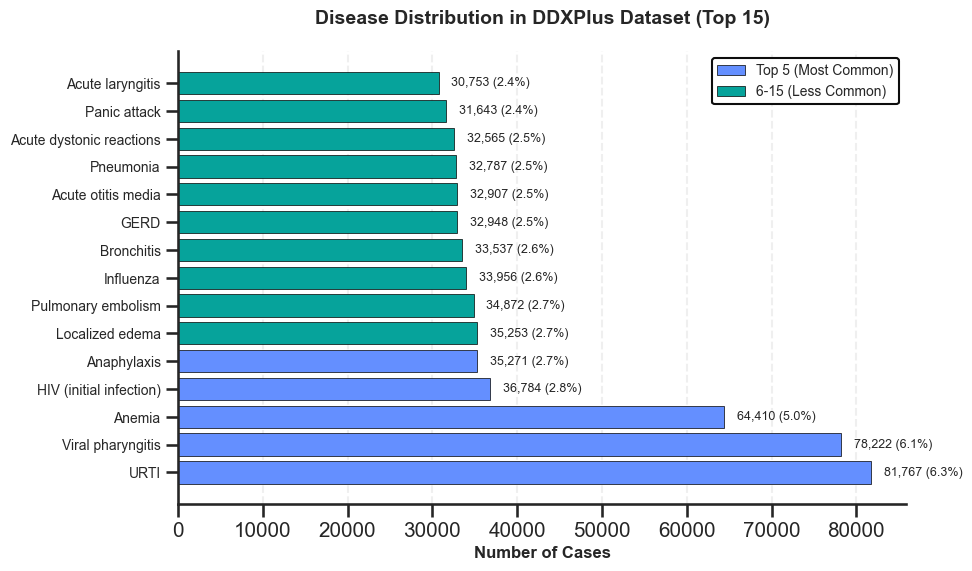

Disease Distribution Statistics:
  Most common: 81,767 cases (6.3%)
  15th most common: 30,753 cases (2.4%)
  Imbalance ratio (top vs 15th): 2.7:1

  Top 5 total: 296,454 cases (22.9%)
  Top 15 total: 627,675 cases (48.6%)


In [26]:
# Disease distribution with imbalance highlighted
fig, ax = plt.subplots(figsize=FIGSIZE_SINGLE, dpi=100)

# Get top 15 diseases
top_diseases = df_all['PATHOLOGY'].value_counts().head(15)
total_cases = len(df_all)

# Calculate percentages
percentages = (top_diseases / total_cases * 100).values

# Color top 5 (common) differently from rest (less common)
colors = [IBM_COLORS['blue']]*5 + [IBM_COLORS['teal']]*10

# Horizontal bar chart
bars = ax.barh(range(len(top_diseases)), top_diseases.values, 
               color=colors, edgecolor='black', linewidth=0.5)

# Labels
ax.set_yticks(range(len(top_diseases)))
ax.set_yticklabels(top_diseases.index, fontsize=10)
ax.set_xlabel('Number of Cases', fontsize=12, fontweight='bold')
ax.set_title('Disease Distribution in DDXPlus Dataset (Top 15)', 
             fontsize=14, fontweight='bold', pad=20)

# Add value labels on bars with percentages
for i, (bar, value, pct) in enumerate(zip(bars, top_diseases.values, percentages)):
    ax.text(value + 1500, i, f'{value:,} ({pct:.1f}%)', 
            va='center', fontsize=9)

# Grid and styling
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend at TOP RIGHT
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=IBM_COLORS['blue'], edgecolor='black', linewidth=0.5,
          label='Top 5 (Most Common)'),
    Patch(facecolor=IBM_COLORS['teal'], edgecolor='black', linewidth=0.5,
          label='6-15 (Less Common)')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, 
          fontsize=10, framealpha=0.95, edgecolor='black')

plt.tight_layout()
plt.savefig('figures/01_disease_distribution.png', dpi=DPI, bbox_inches='tight')
plt.show()

# Print statistics
print(f"Disease Distribution Statistics:")
print(f"  Most common: {top_diseases.iloc[0]:,} cases ({percentages[0]:.1f}%)")
print(f"  15th most common: {top_diseases.iloc[-1]:,} cases ({percentages[-1]:.1f}%)")
print(f"  Imbalance ratio (top vs 15th): {top_diseases.iloc[0]/top_diseases.iloc[-1]:.1f}:1")
print(f"\n  Top 5 total: {top_diseases.iloc[:5].sum():,} cases ({top_diseases.iloc[:5].sum()/total_cases*100:.1f}%)")
print(f"  Top 15 total: {top_diseases.sum():,} cases ({top_diseases.sum()/total_cases*100:.1f}%)")


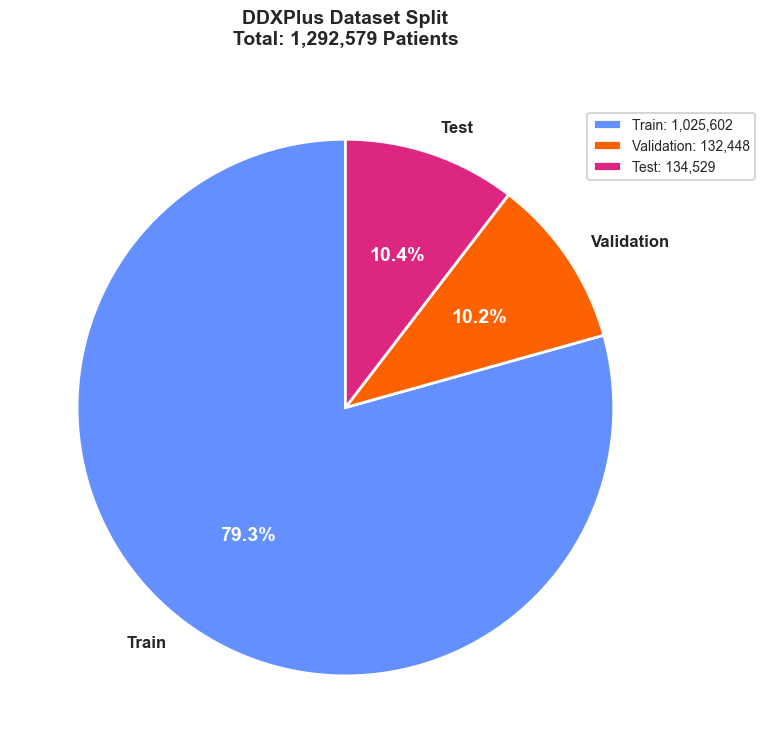

Split proportions:
  Train: 1,025,602 (79.3%)
  Validation: 132,448 (10.2%)
  Test: 134,529 (10.4%)


In [28]:
# Dataset split visualization
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

# Data
splits = ['Train', 'Validation', 'Test']
sizes = [len(dataset['train']), len(dataset['validate']), len(dataset['test'])]
percentages = [s/sum(sizes)*100 for s in sizes]
colors_split = [IBM_COLORS['blue'], IBM_COLORS['orange'], IBM_COLORS['magenta']]


# Pie chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=splits,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_split,
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Make percentage text white and bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

# Title
ax.set_title('DDXPlus Dataset Split\nTotal: 1,292,579 Patients', 
             fontsize=14, fontweight='bold', pad=20)

# Add legend with actual counts
legend_labels = [f'{split}: {size:,}' for split, size in zip(splits, sizes)]
ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(0.85, 0.95), 
          frameon=True, fontsize=10)

plt.tight_layout()
plt.savefig('figures/02_dataset_split.png', dpi=DPI, bbox_inches='tight')
plt.show()

print("Split proportions:")
for split, size, pct in zip(splits, sizes, percentages):
    print(f"  {split}: {size:,} ({pct:.1f}%)")


In [30]:
# Add derived columns (lowercase for easy typing)
print("Creating derived columns...")

# Count number of evidences per patient
df_all['num_evidences'] = df_all['EVIDENCES'].apply(len)

print(f"✓ num_evidences column created")
print(f"  Range: {df_all['num_evidences'].min()}-{df_all['num_evidences'].max()}")
print(f"  Mean: {df_all['num_evidences'].mean():.1f}")


Creating derived columns...
✓ num_evidences column created
  Range: 24-556
  Mean: 242.0


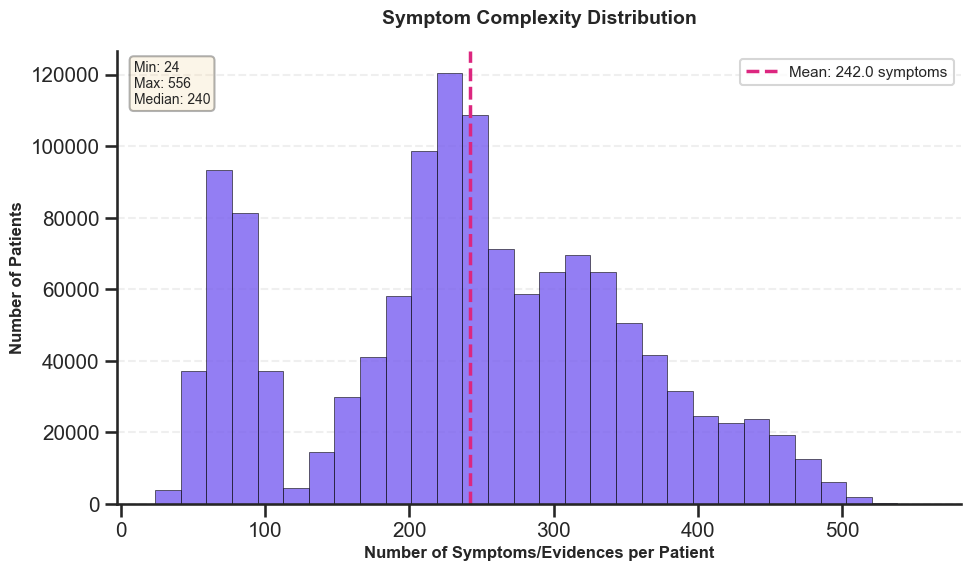


Symptom statistics:
count    1.292579e+06
mean     2.419539e+02
std      1.097306e+02
min      2.400000e+01
25%      1.750000e+02
50%      2.400000e+02
75%      3.190000e+02
max      5.560000e+02
Name: num_evidences, dtype: float64


In [32]:
# Symptoms per patient distribution
fig, ax = plt.subplots(figsize=FIGSIZE_SINGLE, dpi=100)

# Histogram
n, bins, patches = ax.hist(df_all['num_evidences'], bins=30, 
                            color=IBM_COLORS['purple'], 
                            edgecolor='black', linewidth=0.5, alpha=0.8)

# Add mean line
mean_symptoms = df_all['num_evidences'].mean()
ax.axvline(mean_symptoms, color=IBM_COLORS['magenta'], 
           linestyle='--', linewidth=2.5, 
           label=f'Mean: {mean_symptoms:.1f} symptoms')

# Labels
ax.set_xlabel('Number of Symptoms/Evidences per Patient', 
              fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Symptom Complexity Distribution', 
             fontsize=14, fontweight='bold', pad=20)

# Grid and styling
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend
ax.legend(loc='upper right', frameon=True, fontsize=11)

# Add statistics box
stats_text = f'Min: {df_all["num_evidences"].min()}\n'
stats_text += f'Max: {df_all["num_evidences"].max()}\n'
stats_text += f'Median: {df_all["num_evidences"].median():.0f}'
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('figures/03_symptoms_per_patient.png', dpi=DPI, bbox_inches='tight')
plt.show()

print(f"\nSymptom statistics:")
print(df_all['num_evidences'].describe())


In [31]:
# Save processed data for future use
print("Saving processed dataset...")

# Create data folder structure
import os
os.makedirs('data/processed', exist_ok=True)

# Save as pickle (preserves all data types, fast)
df_all.to_pickle('data/processed/ddxplus_all.pkl')
print(f"✓ Saved: data/processed/ddxplus_all.pkl")
print(f"  Size: {df_all.shape[0]:,} rows × {df_all.shape[1]} columns")
print(f"  File size: ~{os.path.getsize('data/processed/ddxplus_all.pkl') / 1024 / 1024:.1f} MB")

print("\nColumns in saved dataset:")
for col in df_all.columns:
    print(f"  - {col}")


Saving processed dataset...
✓ Saved: data/processed/ddxplus_all.pkl
  Size: 1,292,579 rows × 7 columns
  File size: ~465.7 MB

Columns in saved dataset:
  - AGE
  - DIFFERENTIAL_DIAGNOSIS
  - SEX
  - PATHOLOGY
  - EVIDENCES
  - INITIAL_EVIDENCE
  - num_evidences


Children (0-18): 236,804 (18.3%)
Adults (18-65): 863,875 (66.8%)
Elderly (65-110): 191,900 (14.8%)


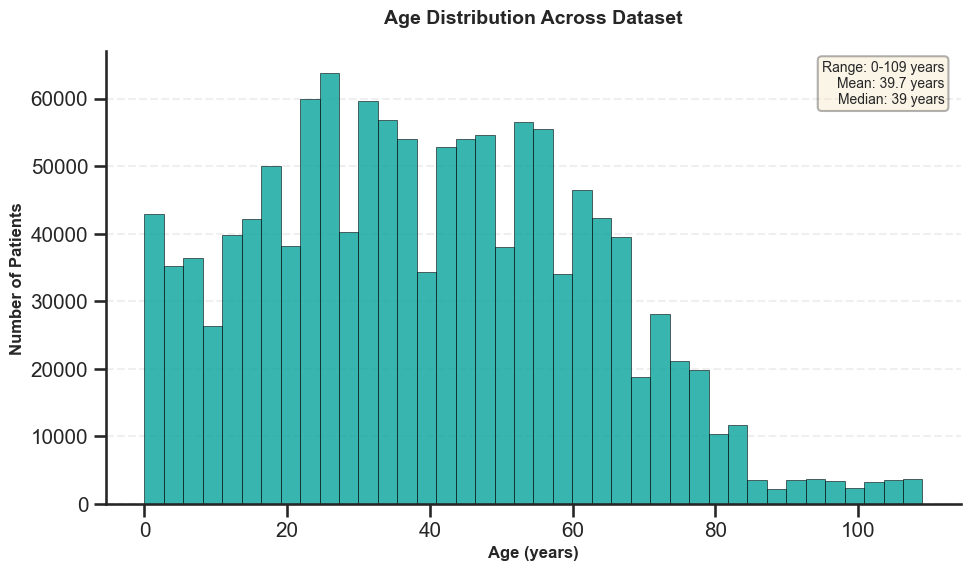

In [33]:
# Age distribution
fig, ax = plt.subplots(figsize=FIGSIZE_SINGLE, dpi=100)

# Histogram
n, bins, patches = ax.hist(df_all['AGE'], bins=40, 
                            color=IBM_COLORS['teal'], 
                            edgecolor='black', linewidth=0.5, alpha=0.8)

# Labels
ax.set_xlabel('Age (years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Age Distribution Across Dataset', 
             fontsize=14, fontweight='bold', pad=20)

# Grid and styling
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add age group annotations
age_groups = [
    (0, 18, 'Children'),
    (18, 65, 'Adults'),
    (65, 110, 'Elderly')
]

for start, end, label in age_groups:
    count = ((df_all['AGE'] >= start) & (df_all['AGE'] < end)).sum()
    pct = count / len(df_all) * 100
    print(f"{label} ({start}-{end}): {count:,} ({pct:.1f}%)")

# Statistics box
stats_text = f'Range: {df_all["AGE"].min()}-{df_all["AGE"].max()} years\n'
stats_text += f'Mean: {df_all["AGE"].mean():.1f} years\n'
stats_text += f'Median: {df_all["AGE"].median():.0f} years'
ax.text(0.98, 0.98, stats_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('figures/04_age_distribution.png', dpi=DPI, bbox_inches='tight')
plt.show()


#### Exploring inconsistencies 

Initial symptom is defined as 1 symptom.I would like to validate if initial symptom is always included in the final evidence column.

In [34]:
# Check: Is INITIAL_EVIDENCE always in the EVIDENCES list?
print("Verifying INITIAL_EVIDENCE definition...")

# Test: Is initial evidence always part of all evidences?
def check_initial_in_evidences(row):
    initial = row['INITIAL_EVIDENCE']
    evidences = row['EVIDENCES']
    return initial in evidences

in_list = df_all.apply(check_initial_in_evidences, axis=1)

print(f"\nIs INITIAL_EVIDENCE always in EVIDENCES list?")
print(f"  Yes: {in_list.sum():,} patients ({in_list.sum()/len(df_all)*100:.1f}%)")
print(f"  No:  {(~in_list).sum():,} patients ({(~in_list).sum()/len(df_all)*100:.1f}%)")

if in_list.all():
    print("\n✓ CONFIRMED: INITIAL_EVIDENCE is always included in EVIDENCES")
    print("  → It's the 'chief complaint' - what patient presented with")
else:
    print("\n⚠ WARNING: INITIAL_EVIDENCE sometimes NOT in EVIDENCES list")
    print("  → May have different meaning than 'first symptom'")

# Check a few examples
print("\n\nExample patients:")
for i in range(3):
    patient = df_all.iloc[i]
    print(f"\nPatient {i}:")
    print(f"  Initial: {patient['INITIAL_EVIDENCE']}")
    print(f"  All evidences: {patient['EVIDENCES'][:5]}...")
    print(f"  Is initial in list? {patient['INITIAL_EVIDENCE'] in patient['EVIDENCES']}")


Verifying INITIAL_EVIDENCE definition...

Is INITIAL_EVIDENCE always in EVIDENCES list?
  Yes: 1,292,579 patients (100.0%)
  No:  0 patients (0.0%)

✓ CONFIRMED: INITIAL_EVIDENCE is always included in EVIDENCES
  → It's the 'chief complaint' - what patient presented with


Example patients:

Patient 0:
  Initial: E_91
  All evidences: ['E_4...
  Is initial in list? True

Patient 1:
  Initial: E_50
  All evidences: ['E_9...
  Is initial in list? True

Patient 2:
  Initial: E_77
  All evidences: ['E_5...
  Is initial in list? True


Next, we will look into evidences per patient (mean is 242).

In [35]:
# Deep dive into EVIDENCES structure
print("="*70)
print("INVESTIGATING EVIDENCES STRUCTURE")
print("="*70)

# Look at raw data from first patient
patient0 = df_all.iloc[0]

print("\n1. EVIDENCES column type and structure:")
print(f"   Type: {type(patient0['EVIDENCES'])}")
print(f"   Length: {len(patient0['EVIDENCES'])}")

print("\n2. First 20 items in EVIDENCES:")
for i, ev in enumerate(patient0['EVIDENCES'][:20], 1):
    print(f"   {i:2}. {ev}")

print("\n3. Check if it's ALL 223 codes or just present ones:")
print(f"   Total evidence codes in dataset: {len(evidences)}")
print(f"   Patient 0 evidences count: {len(patient0['EVIDENCES'])}")
print(f"   Are they the same? {len(patient0['EVIDENCES']) == len(evidences)}")

print("\n4. Sample 3 more patients:")
for i in range(1, 4):
    print(f"   Patient {i}: {len(df_all.iloc[i]['EVIDENCES'])} evidences")

print("\n5. Check unique lengths:")
unique_lengths = df_all['num_evidences'].value_counts().head(10)
print(unique_lengths)


INVESTIGATING EVIDENCES STRUCTURE

1. EVIDENCES column type and structure:
   Type: <class 'str'>
   Length: 221

2. First 20 items in EVIDENCES:
    1. [
    2. '
    3. E
    4. _
    5. 4
    6. 8
    7. '
    8. ,
    9.  
   10. '
   11. E
   12. _
   13. 5
   14. 0
   15. '
   16. ,
   17.  
   18. '
   19. E
   20. _

3. Check if it's ALL 223 codes or just present ones:
   Total evidence codes in dataset: 223
   Patient 0 evidences count: 221
   Are they the same? False

4. Sample 3 more patients:
   Patient 1: 393 evidences
   Patient 2: 418 evidences
   Patient 3: 205 evidences

5. Check unique lengths:
num_evidences
236    13541
228    12408
244    11770
245    11311
237    11186
220    11100
227    11004
229    10811
77     10622
235    10395
Name: count, dtype: int64


In [36]:
# Fix EVIDENCES column - convert string to actual list
import ast

print("Converting EVIDENCES from string to list...")

df_all['EVIDENCES'] = df_all['EVIDENCES'].apply(ast.literal_eval)

print("✓ Conversion complete")

# NOW count correctly
df_all['num_evidences'] = df_all['EVIDENCES'].apply(len)

print(f"\nRecalculated statistics:")
print(f"  Mean: {df_all['num_evidences'].mean():.1f}")
print(f"  Median: {df_all['num_evidences'].median():.0f}")
print(f"  Min: {df_all['num_evidences'].min()}")
print(f"  Max: {df_all['num_evidences'].max()}")

# Verify by checking first patient
patient0 = df_all.iloc[0]
print(f"\nPatient 0 verification:")
print(f"  Type now: {type(patient0['EVIDENCES'])}")
print(f"  Number of evidences: {len(patient0['EVIDENCES'])}")
print(f"  First 5 evidences: {patient0['EVIDENCES'][:5]}")


Converting EVIDENCES from string to list...
✓ Conversion complete

Recalculated statistics:
  Mean: 19.8
  Median: 20
  Min: 2
  Max: 47

Patient 0 verification:
  Type now: <class 'list'>
  Number of evidences: 19
  First 5 evidences: ['E_48', 'E_50', 'E_53', 'E_54_@_V_161', 'E_54_@_V_183']


In [37]:
# Comprehensive check of all column types
print("="*70)
print("CHECKING ALL COLUMN DATA TYPES")
print("="*70)

print("\nCurrent column types:")
for col in df_all.columns:
    sample = df_all[col].iloc[0]
    print(f"  {col:30} → {type(sample).__name__:15} | Sample: {str(sample)[:60]}")

# Identify which columns need conversion
print("\n" + "="*70)
print("COLUMNS THAT NEED CONVERSION:")
print("="*70)

needs_conversion = []

for col in df_all.columns:
    sample = df_all[col].iloc[0]
    # Check if it's a string that looks like a list or dict
    if isinstance(sample, str) and (sample.startswith('[') or sample.startswith('{')):
        needs_conversion.append(col)
        print(f"  ⚠️  {col} → Currently string, should be list/dict")

if not needs_conversion:
    print("  ✓ All columns have correct types!")


CHECKING ALL COLUMN DATA TYPES

Current column types:
  AGE                            → int64           | Sample: 18
  DIFFERENTIAL_DIAGNOSIS         → str             | Sample: [['Bronchitis', 0.19171203430383882], ['Pneumonia', 0.175793
  SEX                            → str             | Sample: M
  PATHOLOGY                      → str             | Sample: URTI
  EVIDENCES                      → list            | Sample: ['E_48', 'E_50', 'E_53', 'E_54_@_V_161', 'E_54_@_V_183', 'E_
  INITIAL_EVIDENCE               → str             | Sample: E_91
  num_evidences                  → int64           | Sample: 19

COLUMNS THAT NEED CONVERSION:
  ⚠️  DIFFERENTIAL_DIAGNOSIS → Currently string, should be list/dict
